In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import pandas_profiling

In [2]:
df = pd.read_csv("sample_data_short.csv", sep=";")

/home/bcoelho/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,17,18,19,20,33,34,35,36,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,nome_remetente,cpf_remetente,uf_origem,municipio_origem,cd_mun_origem,latitude_origem,longitude_origem,ctf_remetente,tipo_origem,nome_patio_origem,numero_serie_autex,numero_autorizacao_original,tipo_autex,orgao_emissor_autex,dt_validade_autex,numero_di,orgao_emissor_di,dt_validade_di,nome_porto_entrada,pais_origem,numero_autesp,orgao_emissor_autesp,dt_validade_autesp,uf_destino,...,nome_patio_destino,nome_porto_saida_pais,municipio_porto_destino,uf_porto_destino,pais_destino,dt_emissao,ano,dt_validade_inicial,dt_validade_final,ultima_transacao,dt_ultima_transacao,numero_oferta,numero_serie_dof,codigo_controle_dof,rota_transporte,produto,produto_agrupado,id_produto_agrupado,nome_cientifico,nome_popular,especie_agrupada,id_especie_agrupada,volume,unidade,valor
0,690796,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,MARTINS E RABELO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,MATRIZ,NaN,NaN,NaN,NaN,2017-08-03,2017,2017-08-03,2017-10-03,Recebido,2017-09-03,839251800.0,17501314,2157613173367454,RIO BRANCO/AC-RIO BRANCO/AC,Madeira serrada (viga),Madeira serrada bruta,12,Apuleia leiocarpa,Garapeira,Garapeira,117,0.522,M3,78.30
1,690797,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,MARTINS E RABELO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC,...,MATRIZ,NaN,NaN,NaN,NaN,2017-08-03,2017,2017-08-03,2017-10-03,Recebido,2017-09-03,839251800.0,17501314,2157613173367454,RIO BRANCO/AC-RIO BRANCO/AC,Madeira serrada (viga),Madeira serrada bruta,12,Couratari guianensis,Tauari,Tauari,70,5.200,M3,78.00
2,690798,L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME,24438974000110,AC,SENA MADUREIRA,1200500,-9.771175,-69.381570,6559713,PATIO,L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,...,Pátio Madeiras Pau-Brasil LTDA EPP,NaN,NaN,NaN,NaN,2017-03-29,2017,2017-03-29,2017-04-04,Recebido,2017-05-04,841804350.0,17588524,2589696162915271,SENA MADUREIRA/AC-SAO PAULO/SP,Alisar,Produtos acabados de madeira,13,Couratari macrosperma,Tauari,Tauari,70,1.908,M3,1457.65
3,690799,L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME,24438974000110,AC,SENA MADUREIRA,1200500,-9.771175,-69.381570,6559713,PATIO,L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,...,Pátio Madeiras Pau-Brasil LTDA EPP,NaN,NaN,NaN,NaN,2017-03-29,2017,2017-03-29,2017-04-04,Recebido,2017-05-04,841804350.0,17588524,2589696162915271,SENA MADUREIRA/AC-SAO PAULO/SP,Portal ou Batente,Produtos acabados de madeira,13,Couratari macrosperma,Tauari,Tauari,70,7.314,M3,4587.94
4,690800,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,MARTINS E RABELO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RO,...,VALE VERDES IND E COM DE MADEIRAS IMP E EXP LTDA,NaN,NaN,NaN,NaN,2017-04-04,2017,2017-04-04,2017-10-04,Cancelado,2017-04-04,843635530.0,17617862,2771552576985232,RIO BRANCO/AC-GUAJARA-MIRIM/RO,Madeira serrada (prancha),Madeira serrada bruta,12,Cedrela odorata,Cedrorosa,Cedro,120,3.833,M3,0.00


In [4]:
df.isna().sum().T / len(df)

id                             0.000000
nome_remetente                 0.000000
cpf_remetente                  0.000000
uf_origem                      0.000000
municipio_origem               0.000000
cd_mun_origem                  0.000000
latitude_origem                0.000000
longitude_origem               0.000000
ctf_remetente                  0.000000
tipo_origem                    0.000000
nome_patio_origem              0.000000
numero_serie_autex             0.797038
numero_autorizacao_original    0.800216
tipo_autex                     0.797038
orgao_emissor_autex            0.799569
dt_validade_autex              0.798372
numero_di                      0.999967
orgao_emissor_di               0.999967
dt_validade_di                 0.999967
nome_porto_entrada             0.999967
pais_origem                    0.999967
numero_autesp                  1.000000
orgao_emissor_autesp           1.000000
dt_validade_autesp             1.000000
uf_destino                     0.000000


In [5]:
df.shape

(1349779, 57)

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

id                             1349779
nome_remetente                    1475
cpf_remetente                     1287
uf_origem                            2
municipio_origem                    69
cd_mun_origem                       69
latitude_origem                     69
longitude_origem                    69
ctf_remetente                     1332
tipo_origem                         21
nome_patio_origem                 1997
numero_serie_autex                1447
numero_autorizacao_original        954
tipo_autex                          12
orgao_emissor_autex                  6
dt_validade_autex                  505
numero_di                           15
orgao_emissor_di                     1
dt_validade_di                      14
nome_porto_entrada                   2
pais_origem                          1
numero_autesp                        0
orgao_emissor_autesp                 0
dt_validade_autesp                   0
uf_destino                          26
municipio_destino        

In [29]:
amount_dof = df["numero_serie_dof"].nunique()
print("Amount of unique DOFs", amount_dof)

Amount of unique DOFs 475764


In [30]:
amount_outside = df[~df["uf_destino"].isin(["RO", "AC"])]["numero_serie_dof"].nunique()

In [31]:
amount_outside / amount_dof

0.23458269225918732

In [32]:
df.groupby("cpf_remetente").count()

,id,nome_remetente,uf_origem,municipio_origem,cd_mun_origem,latitude_origem,longitude_origem,ctf_remetente,tipo_origem,nome_patio_origem,numero_serie_autex,numero_autorizacao_original,tipo_autex,orgao_emissor_autex,dt_validade_autex,numero_di,orgao_emissor_di,dt_validade_di,nome_porto_entrada,pais_origem,numero_autesp,orgao_emissor_autesp,dt_validade_autesp,uf_destino,municipio_destino,...,nome_patio_destino,nome_porto_saida_pais,municipio_porto_destino,uf_porto_destino,pais_destino,dt_emissao,ano,dt_validade_inicial,dt_validade_final,ultima_transacao,dt_ultima_transacao,numero_oferta,numero_serie_dof,codigo_controle_dof,rota_transporte,produto,produto_agrupado,id_produto_agrupado,nome_cientifico,nome_popular,especie_agrupada,id_especie_agrupada,volume,unidade,valor
cpf_remetente,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002********,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,0,0,0,0,0,0,0,0,6270,6270,...,6270,0,0,0,0,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6270,6203,6270,6270,6270,6270,6270
00393247000115,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,0,0,0,0,0,0,0,0,124,124,...,124,0,0,0,0,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124
00525034000108,888,888,888,888,888,888,888,888,888,888,43,43,43,43,43,0,0,0,0,0,0,0,0,888,888,...,888,0,0,0,0,888,888,888,888,888,888,426,888,888,888,888,888,888,888,887,888,888,888,888,888
00534961000186,236,236,236,236,236,236,236,236,236,236,0,0,0,0,0,0,0,0,0,0,0,0,0,236,236,...,147,0,0,0,0,236,236,236,236,236,236,236,236,236,236,236,236,236,236,194,236,236,236,236,236
00587611000188,982,982,982,982,982,982,982,982,982,982,0,0,0,0,0,0,0,0,0,0,0,0,0,982,982,...,982,0,0,0,0,982,982,982,982,982,982,44,982,982,982,982,982,982,982,982,982,982,982,982,982
006********,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,0,0,0,0,0,0,0,0,693,693,...,693,0,0,0,0,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693
00611256000135,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,0,0,0,0,0,0,0,0,0,0,0,0,0,2195,2195,...,1907,0,0,0,0,2195,2195,2195,2195,2195,2195,1898,2195,2195,2195,2195,2195,2195,2195,2172,2195,2195,2195,2195,2195
00614413000166,471,471,471,471,471,471,471,471,471,471,0,0,0,0,0,0,0,0,0,0,0,0,0,471,471,...,471,0,0,0,0,471,471,471,471,471,471,471,471,471,471,471,471,471,471,421,471,471,471,471,471
00641390000189,1267,1267,1267,1267,1267,1267,1267,1267,1267,1267,0,0,0,0,0,0,0,0,0,0,0,0,0,1267,1267,...,1251,0,0,0,0,1267,1267,1267,1267,1267,1267,1236,1267,1267,1267,1267,1267,1267,1267,1259,1267,1267,1267,1267,1267


In [41]:
temp = pd.DataFrame()
cnpj_qtd = (~df["cpf_remetente"].str.contains("\*")).sum() 
person_qtd = df["cpf_remetente"].str.contains("\*").sum()

In [42]:
cnpj_qtd, person_qtd

(1222838, 126941)

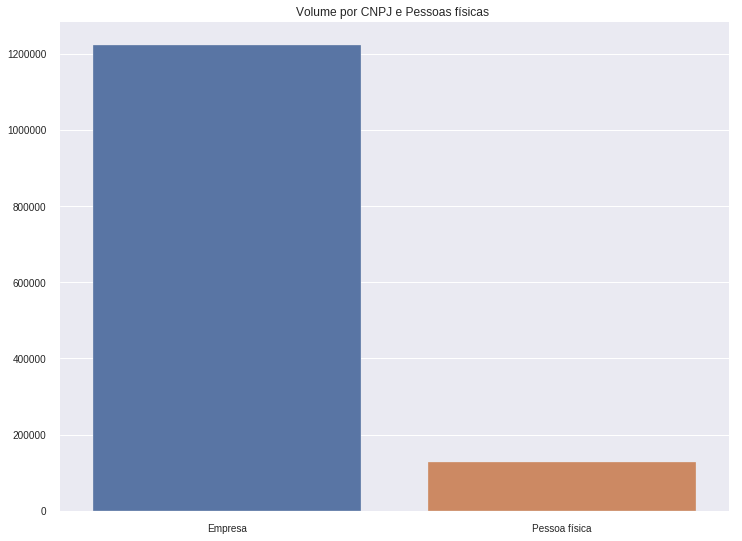

In [50]:
plt.figure(figsize=(12, 9))
sns.barplot(y=[cnpj_qtd, person_qtd], x=["Empresa", "Pessoa física"])
plt.title("Volume por CNPJ e Pessoas físicas ");

In [46]:
dof_group = df.groupby("numero_serie_dof").count()

In [47]:
dof_group

,id,nome_remetente,cpf_remetente,uf_origem,municipio_origem,cd_mun_origem,latitude_origem,longitude_origem,ctf_remetente,tipo_origem,nome_patio_origem,numero_serie_autex,numero_autorizacao_original,tipo_autex,orgao_emissor_autex,dt_validade_autex,numero_di,orgao_emissor_di,dt_validade_di,nome_porto_entrada,pais_origem,numero_autesp,orgao_emissor_autesp,dt_validade_autesp,uf_destino,...,ctf_destinatario,nome_patio_destino,nome_porto_saida_pais,municipio_porto_destino,uf_porto_destino,pais_destino,dt_emissao,ano,dt_validade_inicial,dt_validade_final,ultima_transacao,dt_ultima_transacao,numero_oferta,codigo_controle_dof,rota_transporte,produto,produto_agrupado,id_produto_agrupado,nome_cientifico,nome_popular,especie_agrupada,id_especie_agrupada,volume,unidade,valor
numero_serie_dof,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15412747,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,2,2,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
15412749,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,2,2,0,0,0,0,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
15412753,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15412772,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15412774,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15412775,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15412776,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15412777,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15412778,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


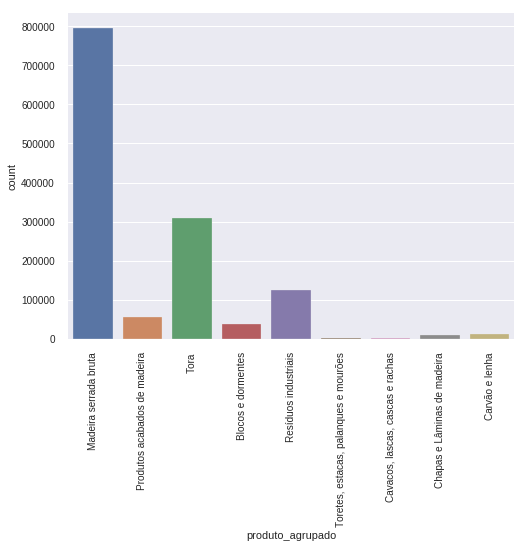

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(df["produto_agrupado"])
plt.xticks(rotation=90);

In [61]:
no_tora = df[df["produto_agrupado"] != "Tora"]
cnpj_qtd = (~no_tora["cpf_remetente"].str.contains("\*")).sum() 
person_qtd = no_tora["cpf_remetente"].str.contains("\*").sum()

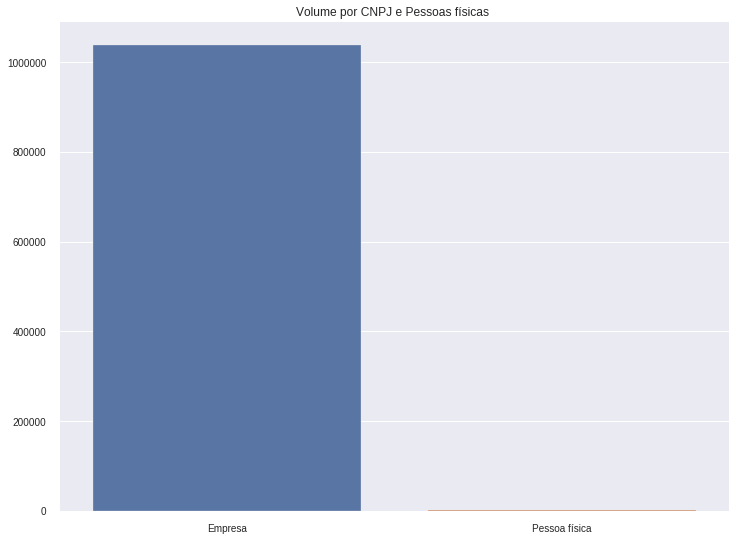

In [62]:
plt.figure(figsize=(12, 9))
sns.barplot(y=[cnpj_qtd, person_qtd], x=["Empresa", "Pessoa física"])
plt.title("Volume por CNPJ e Pessoas físicas ");

In [63]:
person_qtd

945